## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including, a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [ ]:
## import needed libraries and required dataset

import pandas as pd
import matplotlib.pyplot as plt

offices_df = pd.read_csv('the_office_series.csv')

In [ ]:
offices_df = offices_df.rename(columns = {'Unnamed: 0':'episode number',"Viewership":"viewership_mil"} )

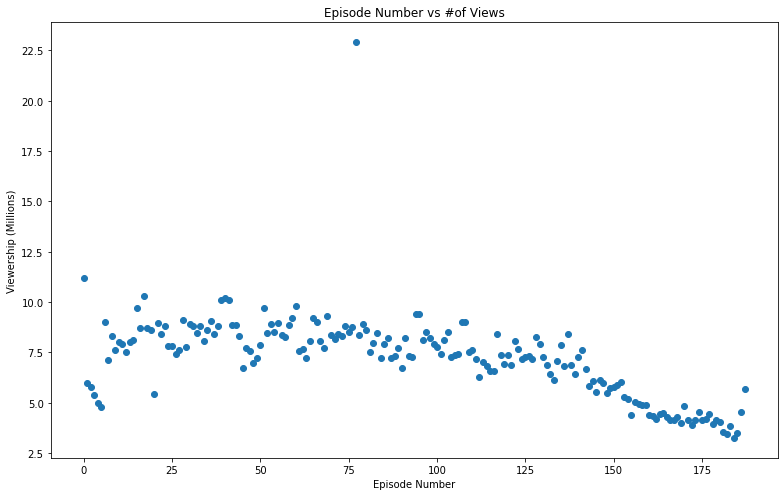

In [ ]:
fig = plt.figure()
plt.scatter(x = offices_df.episode_number,y =  offices_df.viewership_mil)
plt.title('Episode Number vs #of Views')
plt.xlabel('Episode Number');plt.ylabel('Viewership (Millions)')
plt.rcParams['figure.figsize'] = [11, 7]
fig.show()

In [ ]:
offices_df[offices_df.viewership_mil == offices_df.viewership_mil.max()].index

Int64Index([77], dtype='int64')

In [ ]:
## get guests appearance cases

size_system = []
for guest_appear in offices_df.has_guests:
    if guest_appear:
        size_system.append(250)
    else:
        size_system.append(25)

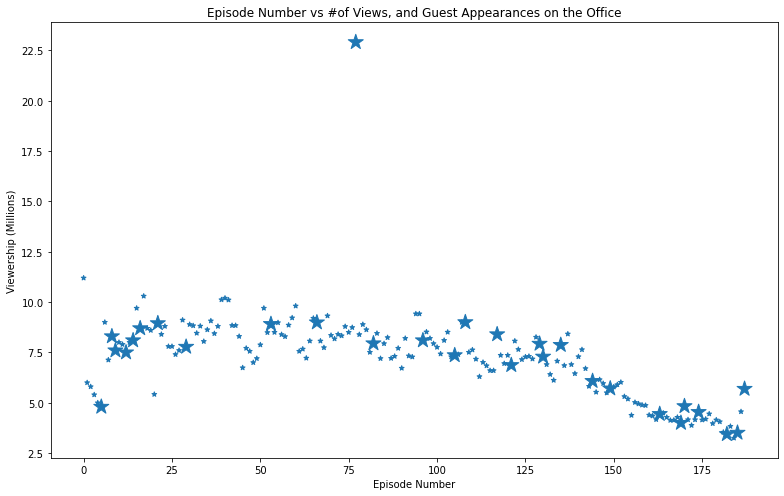

In [ ]:
fig = plt.figure()
plt.scatter(x = offices_df.episode_number,y =  offices_df.viewership_mil, s = size_system,marker='*')
plt.title('Episode Number vs #of Views, and Guest Appearances on the Office')
plt.xlabel('Episode Number');plt.ylabel('Viewership (Millions)')
plt.rcParams['figure.figsize'] = [11, 7]
fig.show()

In [ ]:
## get rates from dataset and set color for rates seperately

color_scheme = []
for rate in offices_df.scaled_ratings:
    if rate < 0.25:
        color_scheme.append('red')
    elif rate >= 0.25 and rate < 0.5:
        color_scheme.append('orange')
    elif rate >= 0.5 and rate < 0.75:
        color_scheme.append('lightgreen')
    elif rate >= 0.75:
        color_scheme.append('darkgreen')

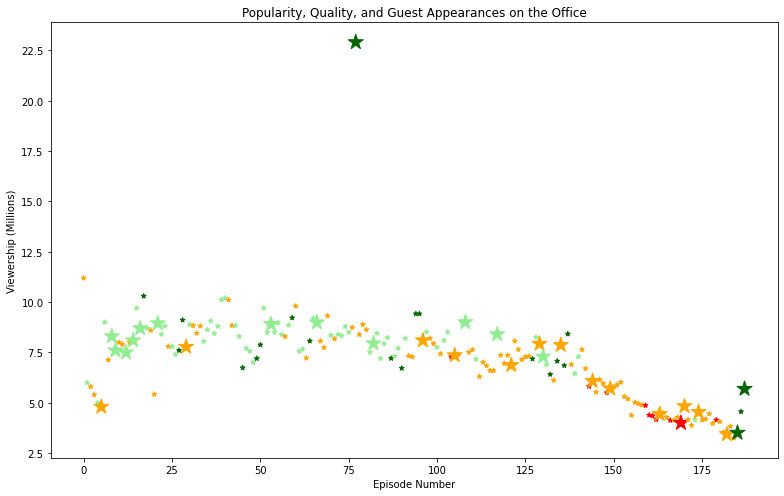

In [ ]:
## plot the dataset episode vs #views plot, having a bigger points if there are guests
## and considering different colors for each range of rates.

fig = plt.figure()
plt.scatter(x = offices_df.episode_number,y =  offices_df.viewership_mil,c =color_scheme, s = size_system,marker='*')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number');plt.ylabel('Viewership (Millions)')
plt.rcParams['figure.figsize'] = [11, 7]
fig.show()

In [ ]:
## Get the max viewrship episode's guest star names

offices_df[offices_df.viewership_mil== offices_df.viewership_mil.max()].guest_stars

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [ ]:
top_star = 'Cloris Leachman'